# Text Classification (Machine Learning and NLP Basics)

## Contents:
1. preprocessing.
2. tokenization.
3. feature extraction.
4. Implement Logistic Regression.
5. Implement Stochastic Gradient Descent and Mini-batch Gradient Descent.
6. Evaluate all the experiments and compare all the results.

##### Dependency packages (NumPy, Pandas, sklearn, tqdm, and matplotlib)

## 1. Data Processing
* Load data with Pandas
* Preprocessing
* Tokenization
* Split data
* Feature extraction (TF-IDF)

### 1.1 Load Data

In [32]:
import pandas as pd

train_df = pd.read_csv('./data/train.csv', header=None)
train_df.columns = ['label', 'title', 'text']
train_df.head()

,label,title,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [33]:
test_df = pd.read_csv('./data/test.csv', header=None)
test_df.columns = ['label', 'title', 'text']
test_df.head()

,label,title,text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


### 1.2 Preprocess
remove all the unrelated characters, including punctuation, urls, and numbers.

In [34]:
import re
import string

class Preprocesser(object):
    def __init__(self, punctuation=True, url=True, number=True):
        self.punctuation = punctuation
        self.url = url
        self.number = number
    
    def apply(self, text):
        text = self._lowercase(text)
        if self.url:
            text = self._remove_url(text)
        if self.punctuation:
            text = self._remove_punctuation(text)
        if self.number:
            text = self._remove_number(text)
        text = re.sub(r'\s+', ' ', text)
        return text

    def _remove_punctuation(self, text):
        text = text.translate(str.maketrans('','', string.punctuation))
        return text
    
    def _remove_url(self, text):
        text = re.sub(r'\S*https?:\S*','',text)
        return text
    
    def _remove_number(self, text):
        text = text.translate(str.maketrans('','', string.digits))
        return text
    
    def _lowercase(self, text):
        text = text.lower()
        return text

##### Test Preprocessor()

In [35]:
text = "Interest rates are trimmed to 7.5 by the South African central bank (https://www.xxx.xxx), but the lack of warning hits the rand and surprises markets."

processer = Preprocesser()
clean_text = processer.apply(text)

print(f'"{text}"')
print('===>')
print(f'"{clean_text}"')

"Interest rates are trimmed to 7.5 by the South African central bank (https://www.xxx.xxx), but the lack of warning hits the rand and surprises markets."
===>
"interest rates are trimmed to by the south african central bank but the lack of warning hits the rand and surprises markets"


### 1.3 Tokenization

In [36]:
def tokenize(text):
    # List of common english stop words, taken from https://gist.github.com/sebleier/554280
    stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",  \
                 "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them","their",   \
                 "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",     \
                 "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a","an",    \
                 "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with","about",     \
                 "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up",      \
                 "down", "in", "out", "on", "off", "over", "under","again", "further", "then", "once", "here","there", "when",    \
                 "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor",\
                 "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

    # \W+: one or more non-words
    tokens = re.split(r"\W+", text.strip())
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

##### Test tokenize()

In [37]:
text = "Interest rates are trimmed to 7.5 by the South African central bank (https://www.xxx.xxx), but the lack of warning hits the rand and surprises markets."

processer = Preprocesser()
clean_text = processer.apply(text)
tokens = tokenize(clean_text)

print(f'{text} ==> {tokens}')

Interest rates are trimmed to 7.5 by the South African central bank (https://www.xxx.xxx), but the lack of warning hits the rand and surprises markets. ==> ['interest', 'rates', 'trimmed', 'south', 'african', 'central', 'bank', 'lack', 'warning', 'hits', 'rand', 'surprises', 'markets']


### 1.4 Data split

In [80]:
from sklearn.model_selection import train_test_split

text_train = train_df['text'].values.astype(str)
label_train = train_df['label'].values.astype(int) - 1 # -1 because labels start from 1

text_test = test_df['text'].values.astype(str)
label_test = test_df['label'].values.astype(int) - 1 # -1 because labels start from 1

text_train, text_valid, label_train, label_valid = train_test_split(text_train,label_train,test_size = 0.1)

print('The size of training set:', text_train.shape[0])
print('The size of validation set:', text_valid.shape[0])
print('The size of test set:', text_test.shape[0])


The size of training set: (108000,)
The size of validation set: 12000
The size of test set: 7600


### 1.5 Feature Extraction

In [39]:
from collections import defaultdict
import numpy as np
from tqdm.notebook import tqdm

class TfIdfExtractor(object):
    
    def __init__(self, vocab_size=None):
        self.vocab_size = vocab_size
        
        self.vocab = defaultdict(lambda: 0)
        self.word2idx = {}
        self.df = defaultdict(lambda: 0)
        self.num_doc = 0
        
        self.processer = Preprocesser()
        
        
    def fit(self, texts):
        ''' 
            Input:
                texts: a list of text (training set)
            Output:
                None
        '''

        self.num_doc = len(texts)
        
        for text in tqdm(texts, desc='fitting text'):
            clean_text = self.processer.apply(text)
            tokens = tokenize(clean_text)
            
            # add unique words in vocab
            self.vocab.update({token:0 for token in tokens})
            # get frequency of words in each document
            self.df.update({token:self.df[token]+1 for token in set(tokens)})

        # sort vocabulary based on document frequency
        self.vocab = dict(sorted(self.vocab.items(), key=lambda x: self.df[x[0]], reverse=True))
                
        if self.vocab_size is not None:
            self.vocab = {key: self.vocab[key] for key in list(self.vocab.keys())[:self.vocab_size]}
        
        self.word2idx = {key: idx for idx, key in enumerate(self.vocab.keys())}


    def transform(self, texts):
        ''' 
            Input:
                texts: a list of text.
            Ouput:
                a N-d matrix (Tf-Idf) 
        '''
        tfidf = np.zeros((len(texts), len(self.vocab)))
        
        for i, text in tqdm(enumerate(texts), desc='transforming', total=len(texts)):
            clean_text = self.processer.apply(text)
            tokens = tokenize(clean_text)
            
            # calculate term frequncy 
            tf = [tokens.count(word)/len(tokens) for idx,word in enumerate(self.word2idx.keys())]
            idf = [np.log((len(texts)+1)/(self.df[word]+1))+1 for idx,word in enumerate(self.word2idx.keys())]
            # tfidf[i] = tf*idf
            tfidf[i] = np.array([x*y for x,y in zip(tf,idf)])
        
        return tfidf
                

##### Test TfIdfExtractor()

In [40]:
extractor = TfIdfExtractor(vocab_size=10)
extractor.fit(text_train[:100])
X = extractor.transform(text_train[:10])

X[:5]

fitting text:   0%|          | 0/100 [00:00<?, ?it/s]

transforming:   0%|          | 0/10 [00:00<?, ?it/s]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.12099876],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01813825, 0.04      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

#### 1.5.4 obtain the TD-IDF and One-hot labels

In [41]:
# You can change this number to see the difference of the performances. (larger vocab size needs more memory)
vocab_size = 4000
num_class = 4

extractor = TfIdfExtractor(vocab_size=vocab_size)
extractor.fit(text_train)

x_train = extractor.transform(text_train)
x_valid = extractor.transform(text_valid)
x_test = extractor.transform(text_test)


# convert label to one-hot vector
y_train = np.zeros((label_train.shape[0], num_class))
y_train[np.arange(label_train.shape[0]), label_train] = 1

y_valid = np.zeros((label_valid.shape[0], num_class))
y_valid[np.arange(label_valid.shape[0]), label_valid] = 1

y_test = np.zeros((label_test.shape[0], num_class))
y_test[np.arange(label_test.shape[0]), label_test] = 1


print('The size of training set:', x_train.shape)
print('The size of validation set:', x_valid.shape)
print('The size of test set:', x_test.shape)


fitting text:   0%|          | 0/108000 [00:00<?, ?it/s]

transforming:   0%|          | 0/108000 [00:00<?, ?it/s]

transforming:   0%|          | 0/12000 [00:00<?, ?it/s]

transforming:   0%|          | 0/7600 [00:00<?, ?it/s]

The size of training set: (108000, 4000)
The size of validation set: (12000, 4000)
The size of test set: (7600, 4000)


## 2. Logistic Regression
Logistic Regression(LR) model with $L_2$ regularization from scratch. 


The objective function of LR:

<center> $J = -\frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^{K}y_{ik}log\frac{e^{f_k}}{\sum_{c=1}^{K}e^{f_c}} + \lambda \sum_{j=1}^{d}w_{kj}^2$ </center>

### 2.1 LR and softmax function

In [42]:
def softmax(x):
    ''' Compute the softmax function for each row of the input x.
        
        Inputs:
            x: A D dimensional vector or N x D dimensional numpy matrix.
        Outputs:
            x: You are allowed to modify x in-place
    '''
    # using x - np.max(x) for numerical stability
    x = np.exp(x-np.max(x))
    x = x/(np.sum(x,axis=1).reshape(-1,1))

    return x


class LogisticRegression(object):
    
    def __init__(self, vocab_size, num_class, lam):
        self.vocab_size = vocab_size
        self.num_class = num_class
        self.lam = lam
        
        ### use np.random.rand() to randomly initialize the parameters
        self.w = np.random.rand(self.vocab_size, num_class)
        self.b = np.random.rand(1, num_class)
        
        
    def objective(self, x, y):
        ''' Implement the objective function
            Inputs:
                x: N-d matrix
                y: N-K matrix
            Output:
                the objective value of LR (scalar)
        '''
        loss = 0
        z = x @ self.w + self.b
        n = x.shape[0]
        # loss = -1/n * sum((y - ln(y_hat)) + lam * w**2).
        loss = - (np.sum(np.sum(y * np.log(softmax(z)) + np.sum(self.lam * self.w * self.w,axis=0) ,axis=1))) / n

        
        return loss
        
    
    def gradient(self, x, y):
        ''' Implement the gradient of J with respect to w (in Deliverable 1)
            Inputs:
                x: N-d matrix
                y: N-K matrix
            Output:
                w_grad: the gradient of J w.r.t weight
                b_grad: the gradient of J w.r.t bias (K dimensional vector)
        '''             
        w_grad = []
        b_grad = []

        n = x.shape[0]
        z = x @ self.w + self.b
        w_grad = (-1/n) * (x.T @ (y - softmax(z)) + 2 * self.lam * self.w)
        b_grad = (-1/n) * (y - softmax(z))
                
        return w_grad, b_grad
    
    
    def gradient_descent(self, w_grad, b_grad, lr):
        ''' graident descent. 
            Updating weights and bias based on Equation: w = w - learning_rate * gradient)
            
            Inputs:
                w_grad: a matrix which is the gradient of J w.r.t to weight
                b_grad: a vector wich is the graident of J w.r.t to bias
            Output:
                None
        '''
        
        
        self.w -= lr*w_grad
        self.b -= lr*b_grad
    
    
    
    def predict(self, x):
        y_hat = softmax(np.dot(x, self.w)+self.b).squeeze()
        return np.argmax(y_hat, axis=-1)

### 2.2 Stochastic Gradient Descent (SGD)

In [71]:
def sgd(model, X, y, lr, lam, num_epoch=100,print_loss = True):
    ''' SGD
        Inputs:
            X: N-d matrix
            y: N-K matrix
            lr: learning rate
            lam: lambda
            num_epoch: the number of epochs
        Output:
            1. A list of training losses against epoch
            2. A list of validation losses against epoch
    '''
    train_losses = []
    valid_losses = []
    
    n, _ = X.shape
    
    for e in range(num_epoch):
        train_loss = 0.
        # pick a random row
        # row = np.random.randint(n)
        for i in range(n):
            w_grad,b_grad = model.gradient(X[i,:].reshape(1,-1),y[i,:].reshape(1,-1))
            model.gradient_descent(w_grad,b_grad,lr)

        train_loss = model.objective(X,y)        
        valid_loss = 0.
        
        valid_loss = model.objective(x_valid,y_valid)

        print(f'At epoch {e+1}, training loss: {train_loss:.4f}, validation loss: {valid_loss:.4f}.')
        train_losses.append(np.mean(train_loss))
        valid_losses.append(np.mean(valid_loss))
            
    return train_losses, valid_losses

Run SGD

In [46]:
''' Update the hyper-parameters (num_epoch, lr, and lam) according to your observation to achieve better performance.
'''
num_epoch_SGD = 20
lr = 0.01
lam = 1E-6

sgd_lr = LogisticRegression(vocab_size, num_class, lam)
sgd_train_losses, sgd_valid_losses = sgd(sgd_lr, x_train, y_train, lr, lam, num_epoch_SGD)

At epoch 1, training loss: 0.6094, validation loss: 0.8076.
At epoch 2, training loss: 0.4866, validation loss: 0.6674.
At epoch 3, training loss: 0.4349, validation loss: 0.5999.
At epoch 4, training loss: 0.4047, validation loss: 0.5585.
At epoch 5, training loss: 0.3843, validation loss: 0.5299.
At epoch 6, training loss: 0.3693, validation loss: 0.5087.
At epoch 7, training loss: 0.3576, validation loss: 0.4922.
At epoch 8, training loss: 0.3481, validation loss: 0.4789.
At epoch 9, training loss: 0.3401, validation loss: 0.4678.
At epoch 10, training loss: 0.3334, validation loss: 0.4584.
At epoch 11, training loss: 0.3275, validation loss: 0.4504.
At epoch 12, training loss: 0.3223, validation loss: 0.4433.
At epoch 13, training loss: 0.3177, validation loss: 0.4371.
At epoch 14, training loss: 0.3136, validation loss: 0.4316.
At epoch 15, training loss: 0.3098, validation loss: 0.4266.
At epoch 16, training loss: 0.3064, validation loss: 0.4221.
At epoch 17, training loss: 0.303

### 2.3 Mini-batch Gradient Descent

In [58]:
def mini_batch_gd(model, X, y, batch_size, lr, lam, num_epoch=100,print_loss=True):
    '''  SGD
        Inputs:
            X: N-d matrix
            y: N-K matrix
            lr: learning rate
            lam: lambda
            num_epoch: the number of epochs
        Output:
            1. A list of training losses against epoch
            2. A list of validation losses against epoch
    '''
    train_losses = []
    valid_losses = []
    
    n, _ = X.shape
    
    for e in range(num_epoch):
        train_loss = 0.
        

        # create an array of random rows for the given batch size
        batch_rows =np.random.choice(n,size=batch_size,replace=False)
        
        # iterate through the rows in the batch
        for _,row in enumerate(batch_rows):
            w_grad,b_grad = model.gradient(X[row,:].reshape(1,-1),y[row,:].reshape(1,-1))
            model.gradient_descent(w_grad,b_grad,lr)

        train_loss = model.objective(X,y)
        
        valid_loss = 0.
        
        valid_loss = model.objective(x_valid,y_valid)
                
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        if print_loss:
            print(f'At epoch {e+1}, training loss: {train_loss:.4f}, validation loss: {valid_loss:.4f}.')
            
    return train_losses, valid_losses

Run Mini-batch GD

In [59]:
''' Update the hyper-parameters (num_epoch, lr, lam, and batch_size) according to your observation 
    to achieve better performance.
'''

num_epoch = 20
lr = 0.01
lam = 1E-6
batch_size = 10000

mini_gd_lr = LogisticRegression(vocab_size, num_class, lam)
mini_gd_train_losses, mini_gd_valid_losses = mini_batch_gd(mini_gd_lr, x_train, y_train, batch_size, lr, lam, num_epoch)

At epoch 1, training loss: 1.2456, validation loss: 1.2967.
At epoch 2, training loss: 1.0896, validation loss: 1.1983.
At epoch 3, training loss: 0.9732, validation loss: 1.1166.
At epoch 4, training loss: 0.8842, validation loss: 1.0538.
At epoch 5, training loss: 0.8165, validation loss: 1.0043.
At epoch 6, training loss: 0.7627, validation loss: 0.9583.
At epoch 7, training loss: 0.7194, validation loss: 0.9186.
At epoch 8, training loss: 0.6850, validation loss: 0.8844.
At epoch 9, training loss: 0.6560, validation loss: 0.8589.
At epoch 10, training loss: 0.6307, validation loss: 0.8358.
At epoch 11, training loss: 0.6096, validation loss: 0.8106.
At epoch 12, training loss: 0.5912, validation loss: 0.7956.
At epoch 13, training loss: 0.5763, validation loss: 0.7732.
At epoch 14, training loss: 0.5610, validation loss: 0.7579.
At epoch 15, training loss: 0.5477, validation loss: 0.7473.
At epoch 16, training loss: 0.5383, validation loss: 0.7389.
At epoch 17, training loss: 0.526

### 2.4 Evaluation

In [50]:
from sklearn.metrics import precision_score, recall_score

y_hat = sgd_lr.predict(x_test)
y_true = np.argmax(y_test, axis=1)

precision = precision_score(y_true, y_hat, average=None)
recall = recall_score(y_true, y_hat, average=None)

print('SGD')
print()
print('  Precision:')
print(f'    class {0}: {precision[0]:.4f}, class {1}: {precision[1]:.4f}, class {2}: {precision[2]:.4f}, class {3}: {precision[3]:.4f}')
print()
print('  Recall:')
print(f'    class {0}: {recall[0]:.4f}, class {1}: {recall[1]:.4f}, class {2}: {recall[2]:.4f}, class {3}: {recall[3]:.4f}')

SGD

  Precision:
    class 0: 0.9083, class 1: 0.9449, class 2: 0.8886, class 3: 0.7964

  Recall:
    class 0: 0.8711, class 1: 0.9574, class 2: 0.7937, class 3: 0.9037


##### plot training loss and validation loss for SGD

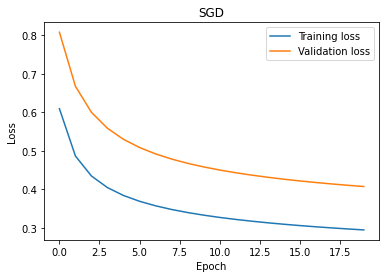

In [51]:
import matplotlib.pyplot as plt

%matplotlib inline


plt.plot(range(num_epoch_SGD), sgd_train_losses, sgd_valid_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(["Training loss", "Validation loss"])
plt.title('SGD')
plt.show()

##### evaluate your model with Mini-batch GD

In [52]:
y_hat = mini_gd_lr.predict(x_test)
y_true = np.argmax(y_test, axis=1)

precision = precision_score(y_true, y_hat, average=None)
recall = recall_score(y_true, y_hat, average=None)

print('Mini-batch GD')
print()
print('  Precision:')
print(f'    class {0}: {precision[0]:.4f}, class {1}: {precision[1]:.4f}, class {2}: {precision[2]:.4f}, class {3}: {precision[3]:.4f}')
print()
print('  Recall:')
print(f'    class {0}: {recall[0]:.4f}, class {1}: {recall[1]:.4f}, class {2}: {recall[2]:.4f}, class {3}: {recall[3]:.4f}')

Mini-batch GD

  Precision:
    class 0: 0.8688, class 1: 0.9273, class 2: 0.8948, class 3: 0.7186

  Recall:
    class 0: 0.8542, class 1: 0.9326, class 2: 0.6847, class 3: 0.8953


##### plot training loss and validation loss for Mini-batch GD

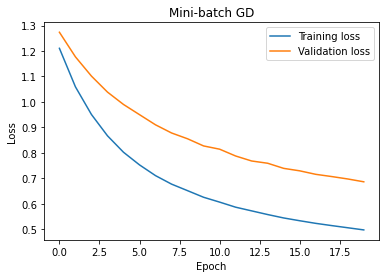

In [53]:
plt.plot(range(num_epoch), mini_gd_train_losses, mini_gd_valid_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(["Training loss", "Validation loss"])
plt.title('Mini-batch GD')
plt.show()

## 3. Cross-Validation

### 3.1 Reload dataset

In [ ]:
text_train = train_df['text'].values.astype(str)
label_train = train_df['label'].values.astype(int) - 1 # -1 because labels start from 1

text_test = test_df['text'].values.astype(str)
label_test = test_df['label'].values.astype(int) - 1 # -1 because labels start from 1


shuffler = np.random.permutation(len(text_train))
text_train_shuffled = text_train[shuffler]
label_train_shuffled = label_train[shuffler]

br = int(len(text_train_shuffled)*.25)



### 3.2 Define the range of $\lambda$.

In [ ]:
lambdas = [1E-7,1E-6,1E-5] ## Fill the values of lambda

### 3.3 cross-validation.


In [90]:
def cross_valid_eval(lambdas,lr,num_epoch):
    # batch_size = 100

    for l in tqdm(lambdas):
        kx_train = []
        kx_valid = []
        ky_train = []
        ky_valid = []
        k_losses = []
        #4 folds
        for k in range(4):
            kx_valid.append(text_train[k*br:(k+1)*br])
            ky_valid.append(label_train[k*br:(k+1)*br])
            kx_train.append(np.delete(text_train,range(k*br,(k+1)*br),axis=0))
            ky_train.append(np.delete(label_train,range(k*br,(k+1)*br),axis=0))
            extractor = TfIdfExtractor(vocab_size=vocab_size)
            extractor.fit(kx_train[k])
            x = extractor.transform(kx_train[k])
            xt = extractor.transform(kx_valid[k])
            y = np.zeros((ky_train[k].shape[0], num_class))
            y[np.arange(ky_train[k].shape[0]), ky_train[k]] = 1
            yt = np.zeros((ky_valid[k].shape[0], num_class))
            yt[np.arange(ky_valid[k].shape[0]), ky_valid[k]] = 1
            model = LogisticRegression(vocab_size,num_class,l)
            sgd(model,x,y,lr,l,num_epoch,False)
            k_losses.append(model.objective(xt,yt))



        
        # model = LogisticRegression(vocab_size,num_class,l)
        # mini_batch_gd(model,x_train,y_train,batch_size,lr,l,num_epoch,False)

        # y_pred = model.predict(text_test)
        # y = np.argmax(label_test,axis=1)

        # precision = precision_score(y,y_pred,average=None)
        # recall = recall_score(y,y_pred,average=None)

        print(f'\nLambda: {l}')
        print(f'  Average Validation Loss:{np.mean(k_losses)}')
        # print('  Precision:')
        # print(f'    class {0}: {precision[0]:.4f}, class {1}: {precision[1]:.4f}, class {2}: {precision[2]:.4f}, class {3}: {precision[3]:.4f}')
        # print('  Recall:')
        # print(f'    class {0}: {recall[0]:.4f}, class {1}: {recall[1]:.4f}, class {2}: {recall[2]:.4f}, class {3}: {recall[3]:.4f}\n')


cross_valid_eval(lambdas,0.01,10)

  0%|          | 0/3 [00:00<?, ?it/s]

fitting text:   0%|          | 0/90000 [00:00<?, ?it/s]

transforming:   0%|          | 0/90000 [00:00<?, ?it/s]

### 3.4 Reporting the best $lambda$ value, and report the recall and precision for each category on the test set.

In [ ]:
lamb = 1e-6
verbose = True

text_train = train_df['text'].values.astype(str)
label_train = train_df['label'].values.astype(int) - 1 # -1 because labels start from 1

text_test = test_df['text'].values.astype(str)
label_test = test_df['label'].values.astype(int) - 1 # -1 because labels start from 1


vocab_size = 4000 
num_class = 4

extractor = TfIdfExtractor(vocab_size=vocab_size)
extractor.fit(text_train)

x_train = extractor.transform(text_train)
x_test = extractor.transform(text_test)

y_train = np.zeros((label_train.shape[0], num_class))
y_train[np.arange(label_train.shape[0]), label_train] = 1

y_test = np.zeros((label_test.shape[0], num_class))
y_test[np.arange(label_test.shape[0]), label_test] = 1


print('The size of training set:', x_train.shape)
print('The size of test set:', x_test.shape)


sgd_lr = LogisticRegression(vocab_size, num_class, lambdaa)
sgd(sgd_lr, x_train, y_train, lr, lamb, 20,False)
print()

##### The best lambda value is 1e-6
##### Lambda: 1e-06
#####   Precision:
#####       class 0: 0.9083, class 1: 0.9449, class 2: 0.8886, class 3: 0.7964
#####    Recall:
#####       class 0: 0.8711, class 1: 0.9574, class 2: 0.7937, class 3: 0.9037

# 4. Conclusion

*  Model is performing well when the lambda is around 1e-6
*  The loss is decreasing with the number of epochs
*  Mini-batch SGD is computationally faster than the SGD
*  Model is very good at predicting class 1 and class 0 when compared to other classes.